## Impotamos las librerias necesarias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Cargamos el conjunto de datos a analizar

In [22]:
life_expectancy = pd.read_csv('Life Expectancy Data.csv')

In [23]:
# Mostramos todas las columnas
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [24]:
# Mostramos las primeras 5 filas del data
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
# Realizamos una descripcion para ver el comportamiento del data set
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [26]:
# Realizamos un analisis de valores nulos por anio
nan_analysis = pd.DataFrame()

In [27]:
for Year_ in life_expectancy.loc[ : , "Year" ].drop_duplicates():
    countrydf = life_expectancy.loc[ life_expectancy['Year'] == Year_ , : ]    
    for column_ in countrydf.columns:        
        percentage =  np.sum(pd.isna( countrydf.loc[ : , column_ ]  )) / countrydf.shape[0]
        dfrow = pd.DataFrame({
            'Year': [ Year_ ]
            , 'column' : [ column_ ]
            , 'percentage.of.nans' : [ percentage ]
        })
        nan_analysis = pd.concat([nan_analysis, dfrow])

In [28]:
nan_analysis

,Year,column,percentage.of.nans
0,2015,Country,0.000000
0,2015,Year,0.000000
0,2015,Status,0.000000
0,2015,Life expectancy,0.000000
0,2015,Adult Mortality,0.000000
...,...,...,...
0,2000,Population,0.218579
0,2000,thinness 1-19 years,0.010929
0,2000,thinness 5-9 years,0.010929
0,2000,Income composition of resources,0.054645


# Limpieza de valores nulos

In [29]:
df_limpio = life_expectancy

In [30]:
# hacemos un recorrido para ver las columnas con valores nulos
for c_ in df_limpio.columns:
    print(c_)
    print(np.sum(df_limpio[c_].isna()))
    print(" ")

Country
0
 
Year
0
 
Status
0
 
Life expectancy 
10
 
Adult Mortality
10
 
infant deaths
0
 
Alcohol
194
 
percentage expenditure
0
 
Hepatitis B
553
 
Measles 
0
 
 BMI 
34
 
under-five deaths 
0
 
Polio
19
 
Total expenditure
226
 
Diphtheria 
19
 
 HIV/AIDS
0
 
GDP
448
 
Population
652
 
 thinness  1-19 years
34
 
 thinness 5-9 years
34
 
Income composition of resources
167
 
Schooling
163
 


In [31]:
# Columnas a limpiar
columnas_a_limpiar= ['Life expectancy ','Adult Mortality','Alcohol','Hepatitis B',' BMI ', 'Polio','Total expenditure','Diphtheria ','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']

In [32]:
# Mediante un ciclo for realizamos la limpieza de estas columnas con la media
for d_ in df_limpio[columnas_a_limpiar]:
    mediana= df_limpio[d_].median()
    df_limpio[d_]=df_limpio[d_].fillna(mediana)

## Comprobamos si se ha realizado la limpieza de manera correcta

In [33]:
for c_ in df_limpio.columns:
    print(c_)
    print(np.sum(df_limpio[c_].isna()))
    print(" ")

Country
0
 
Year
0
 
Status
0
 
Life expectancy 
0
 
Adult Mortality
0
 
infant deaths
0
 
Alcohol
0
 
percentage expenditure
0
 
Hepatitis B
0
 
Measles 
0
 
 BMI 
0
 
under-five deaths 
0
 
Polio
0
 
Total expenditure
0
 
Diphtheria 
0
 
 HIV/AIDS
0
 
GDP
0
 
Population
0
 
 thinness  1-19 years
0
 
 thinness 5-9 years
0
 
Income composition of resources
0
 
Schooling
0
 


## El nuevo dataset sin valores nulos es: df_limpio

In [35]:
df_limpio.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Realizamos el analisis de Bloxplots

#### Bloxplots: El objetivo de utilizar cajas de bigotes es para visualizar la dispersión de los datos y para comparar la distribución de los mismo. También se puede utilizar para detectar valores atípicos o "outliers" en los datos.

##### Primero se realiza el cálculo de los valores valores atípicos para conocer cuántos son y el porcentaje que representan utilizando el método Tukey. Luego se utiliza la técnica de Winsorize para remover los valores valores atípicos y se muestran los boxplots con y sin los valores atípicos de cada columna.

In [37]:
# Creamos un diccionaron con las columnas que utiilizaremos para realizar los boxplots.
bp_cols= {'Life expectancy ':1, 'Adult Mortality':2,
       'infant deaths':3, 'Alcohol':4, 'percentage expenditure':5, 'Hepatitis B':6,
       'Measles ':7, ' BMI ':8, 'under-five deaths ':9, 'Polio':10, 'Total expenditure':11,
       'Diphtheria ':12, ' HIV/AIDS':13, 'GDP':14, 'Population':15,
       ' thinness  1-19 years':16, ' thinness 5-9 years':17,
       'Income composition of resources':18, 'Schooling':19}

# Calculando la cantidad de valores atípicos y su porcentaje usando el método Tukey.
for columna_o in bp_cols.keys():
    q75, q25 = np.percentile(df_limpio[columna_o], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    ##imprimimos los resultados
    print("La cantidad de valores atípicos para --{}-- es {} y su porcentaje es {}".format(columna_o,
                                                                             len((np.where((df_limpio[columna_o] > max_val) | 
                                                                                           (df_limpio[columna_o] < min_val))[0])),len((np.where((df_limpio[columna_o] > max_val) | 
                                                                                           (df_limpio[columna_o] < min_val))[0]))*100/1987))
    

La cantidad de valores atípicos para --Life expectancy -- es 17 y su porcentaje es 0.8555611474584801
La cantidad de valores atípicos para --Adult Mortality-- es 86 y su porcentaje es 4.3281328636134875
La cantidad de valores atípicos para --infant deaths-- es 315 y su porcentaje es 15.853044791142425
La cantidad de valores atípicos para --Alcohol-- es 3 y su porcentaje es 0.1509813789632612
La cantidad de valores atípicos para --percentage expenditure-- es 389 y su porcentaje es 19.577252138902868
La cantidad de valores atípicos para --Hepatitis B-- es 322 y su porcentaje es 16.205334675390034
La cantidad de valores atípicos para --Measles -- es 542 y su porcentaje es 27.27730246602919
La cantidad de valores atípicos para -- BMI -- es 0 y su porcentaje es 0.0
La cantidad de valores atípicos para --under-five deaths -- es 394 y su porcentaje es 19.828887770508302
La cantidad de valores atípicos para --Polio-- es 279 y su porcentaje es 14.041268243583291
La cantidad de valores atípicos 

## Generación de los boxplots
##### Se generan los boxplots con y sin valores atípicos, se guarda el resultado excuyendo los valores atípicos para trabajar con ellos después.

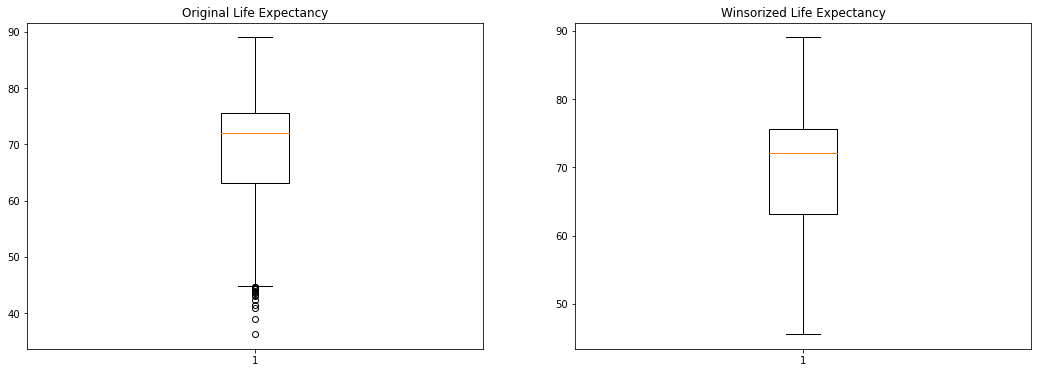

In [43]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = df_limpio['Life expectancy ']
plt.boxplot(original_Life_Expectancy)
plt.title("Original Life Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df_limpio['Life expectancy '],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("Winsorized Life Expectancy")

plt.show()

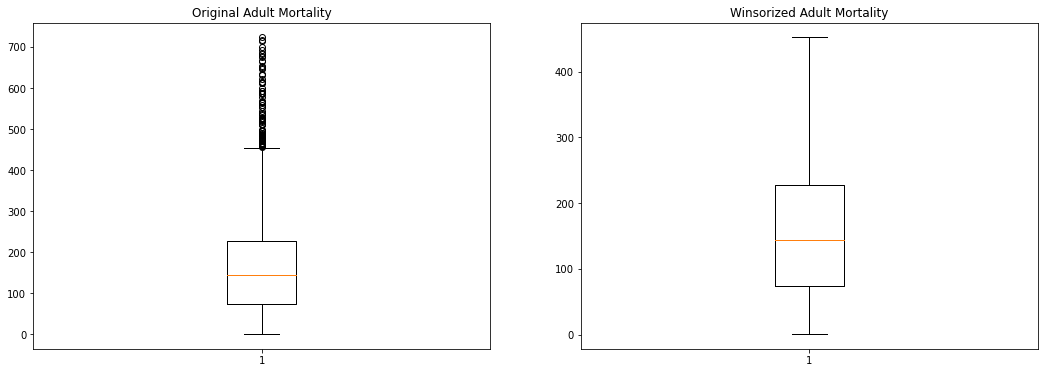

In [45]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df_limpio['Adult Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("Original Adult Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df_limpio['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("Winsorized Adult Mortality")

plt.show()

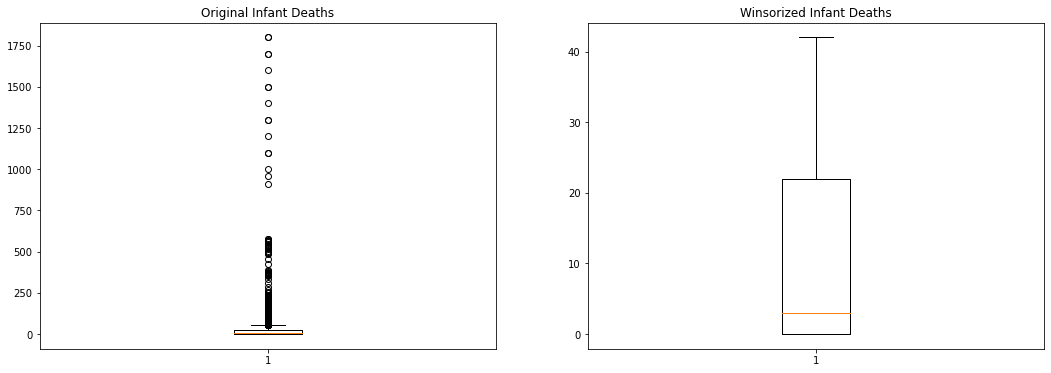

In [46]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df_limpio['infant deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("Original Infant Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df_limpio['infant deaths'],(0,0.15))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("Winsorized Infant Deaths")

plt.show()

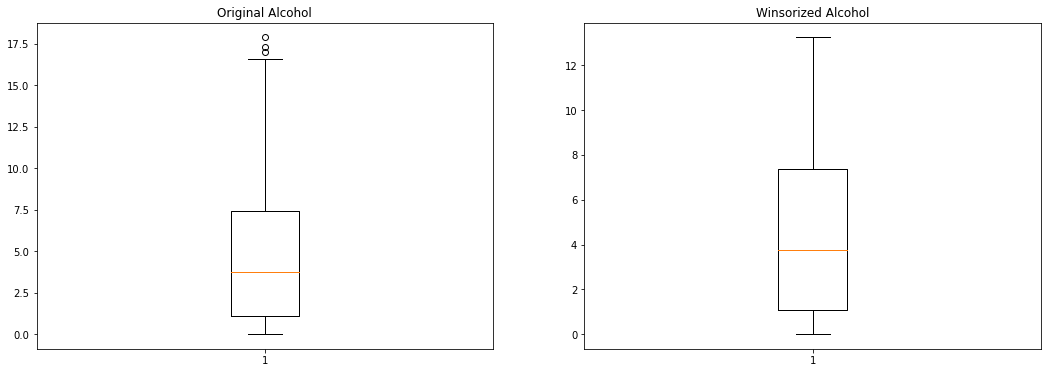

In [47]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = df_limpio['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("Original Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df_limpio['Alcohol'],(0,0.015))
plt.boxplot(winsorized_Alcohol)
plt.title("Winsorized Alcohol")

plt.show()

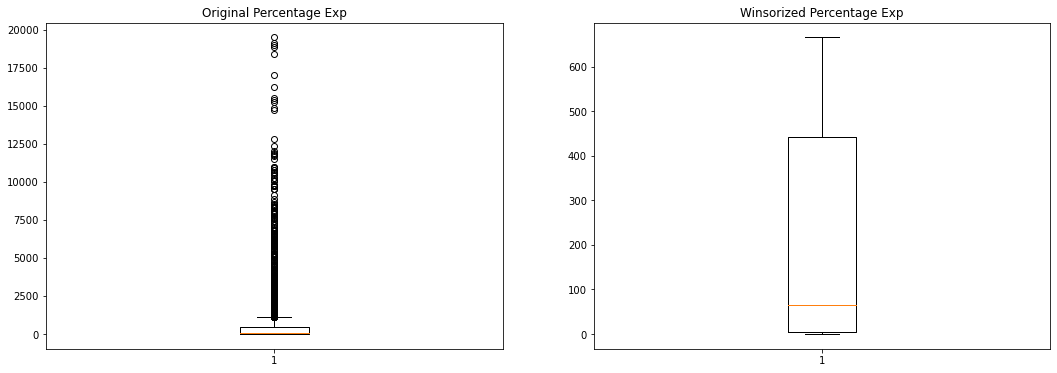

In [48]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df_limpio['percentage expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("Original Percentage Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df_limpio['percentage expenditure'],(0,0.19))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("Winsorized Percentage Exp")

plt.show()

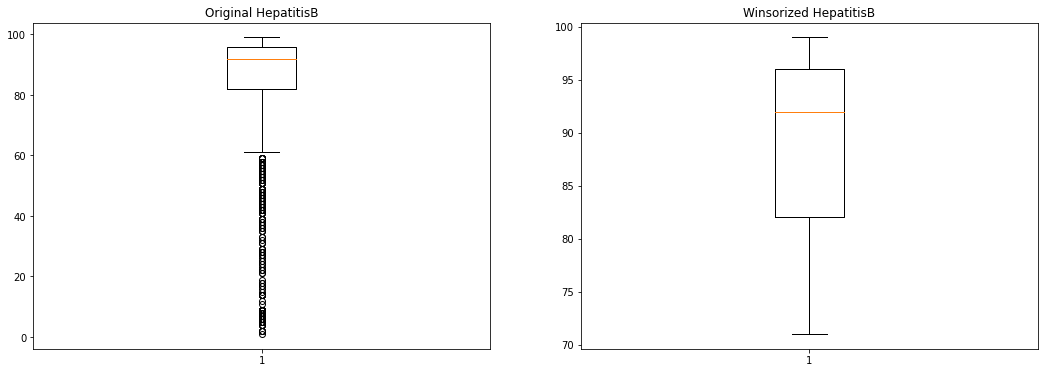

In [49]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df_limpio['Hepatitis B']
plt.boxplot(original_HepatitisB)
plt.title("Original HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df_limpio['Hepatitis B'],(0.16,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("Winsorized HepatitisB")

plt.show()

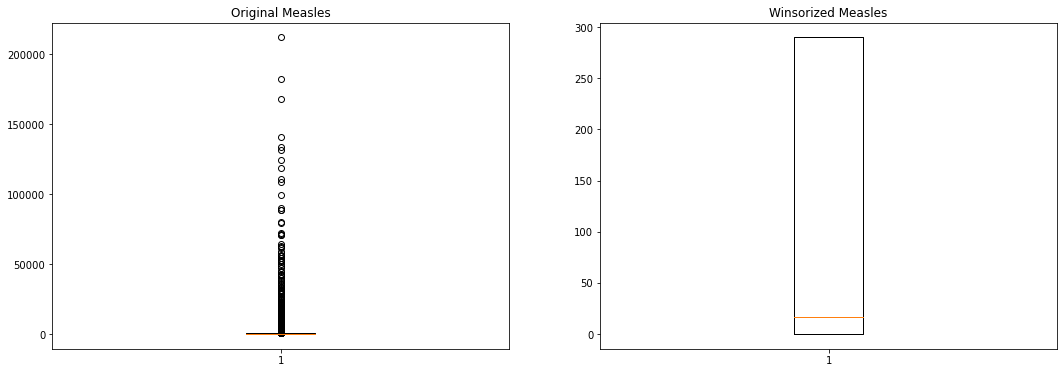

In [50]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = df_limpio['Measles ']
plt.boxplot(original_Measles)
plt.title("Original Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df_limpio['Measles '],(0,0.27))
plt.boxplot(winsorized_Measles)
plt.title("Winsorized Measles")

plt.show()

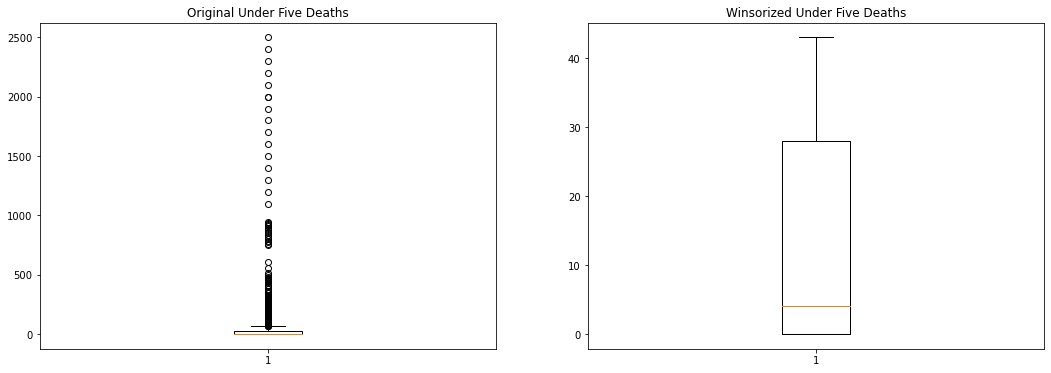

In [51]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df_limpio['under-five deaths ']
plt.boxplot(original_Under_Five_Deaths)
plt.title("Original Under Five Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df_limpio['under-five deaths '],(0,0.19))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("Winsorized Under Five Deaths")

plt.show()

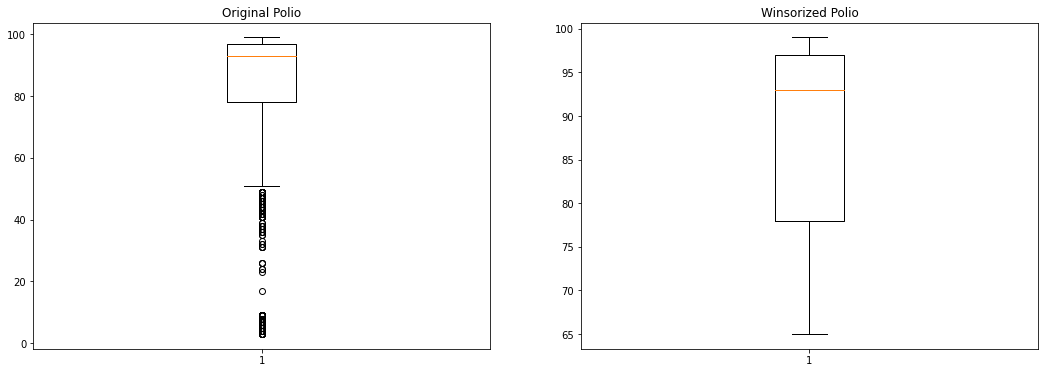

In [52]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df_limpio['Polio']
plt.boxplot(original_Polio)
plt.title("Original Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df_limpio['Polio'],(0.14,0))
plt.boxplot(winsorized_Polio)
plt.title("Winsorized Polio")

plt.show()

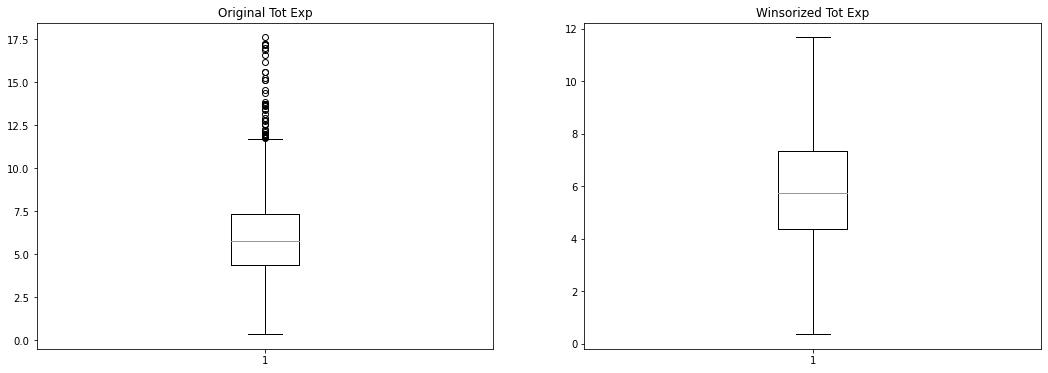

In [53]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = df_limpio['Total expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("Original Tot Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(df_limpio['Total expenditure'],(0,0.02))
plt.boxplot(winsorized_Tot_Exp)
plt.title("Winsorized Tot Exp")

plt.show()

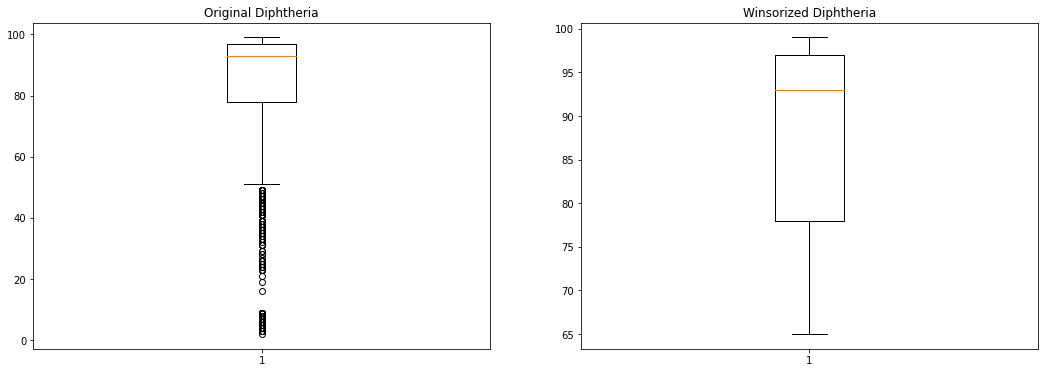

In [54]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df_limpio['Diphtheria ']
plt.boxplot(original_Diphtheria)
plt.title("Original Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df_limpio['Diphtheria '],(0.15,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("Winsorized Diphtheria")

plt.show()

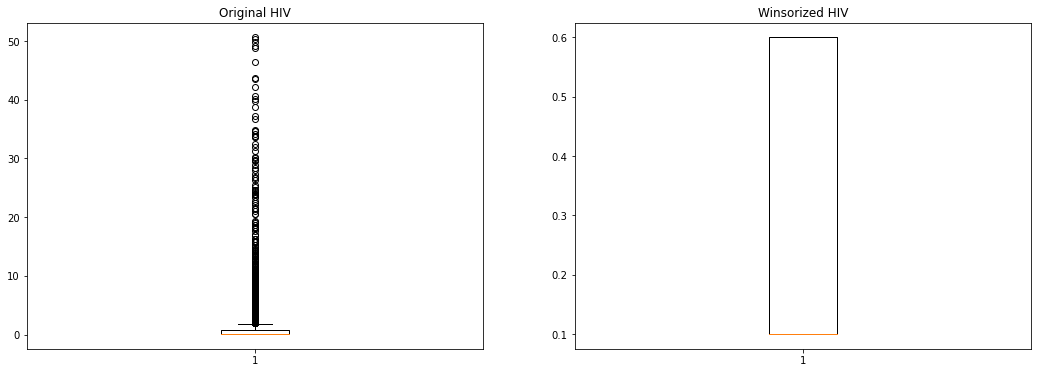

In [55]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df_limpio[' HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("Original HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df_limpio[' HIV/AIDS'],(0,0.27))
plt.boxplot(winsorized_HIV)
plt.title("Winsorized HIV")

plt.show()

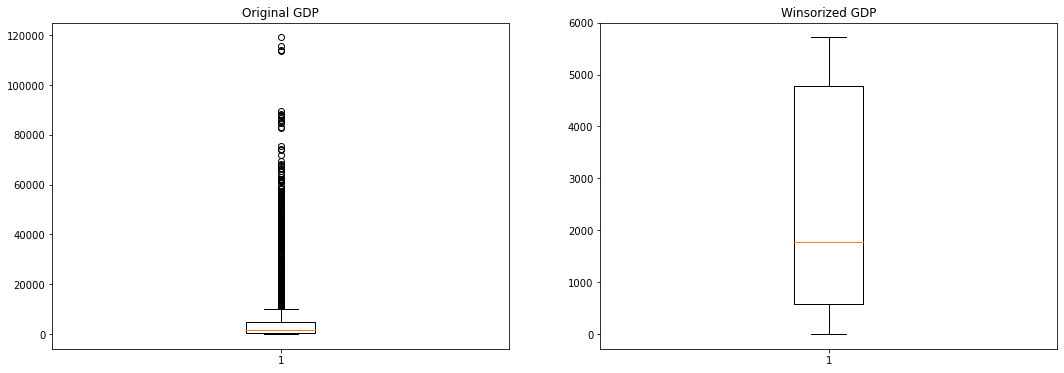

In [56]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df_limpio['GDP']
plt.boxplot(original_GDP)
plt.title("Original GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df_limpio['GDP'],(0,0.22))
plt.boxplot(winsorized_GDP)
plt.title("Winsorized GDP")

plt.show()

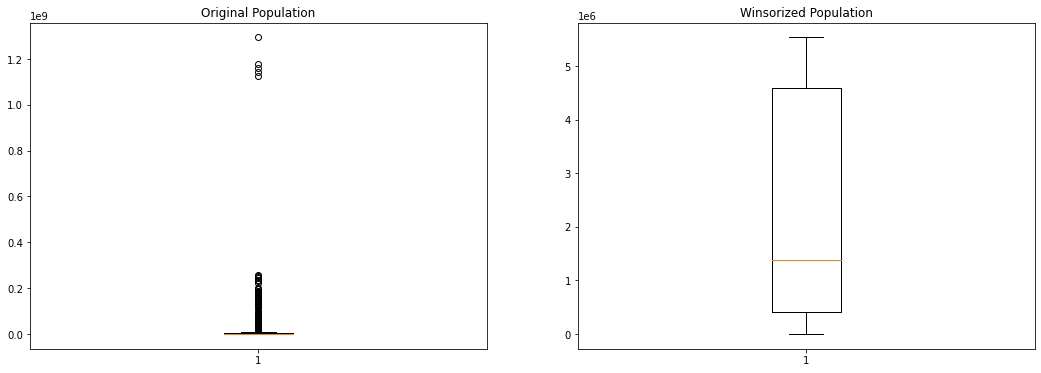

In [57]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df_limpio['Population']
plt.boxplot(original_Population)
plt.title("Original Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(df_limpio['Population'],(0,0.23))
plt.boxplot(winsorized_Population)
plt.title("Winsorized Population")

plt.show()

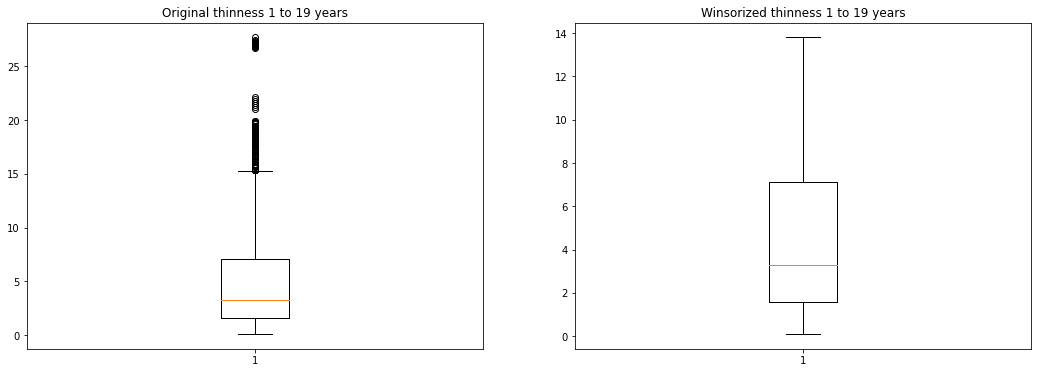

In [58]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df_limpio[' thinness  1-19 years']
plt.boxplot(original_thinness_1to19_years)
plt.title("Original thinness 1 to 19 years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df_limpio[' thinness  1-19 years'],(0,0.05))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("Winsorized thinness 1 to 19 years")

plt.show()

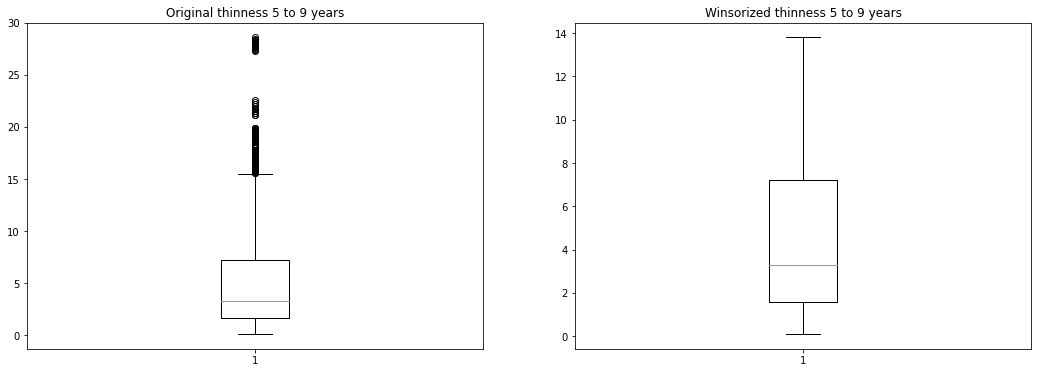

In [59]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df_limpio[' thinness 5-9 years']
plt.boxplot(original_thinness_5to9_years)
plt.title("Original thinness 5 to 9 years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df_limpio[' thinness 5-9 years'],(0,0.05))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("Winsorized thinness 5 to 9 years")

plt.show()

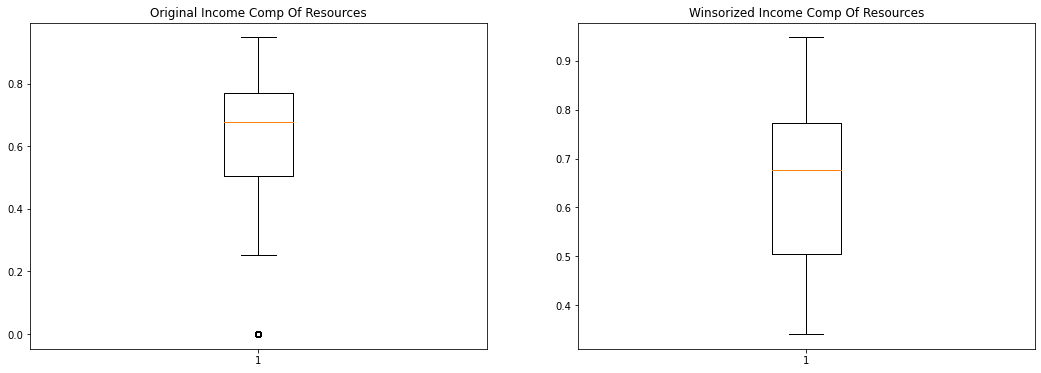

In [60]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df_limpio['Income composition of resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("Original Income Comp Of Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(df_limpio['Income composition of resources'],(0.07,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("Winsorized Income Comp Of Resources")

plt.show()

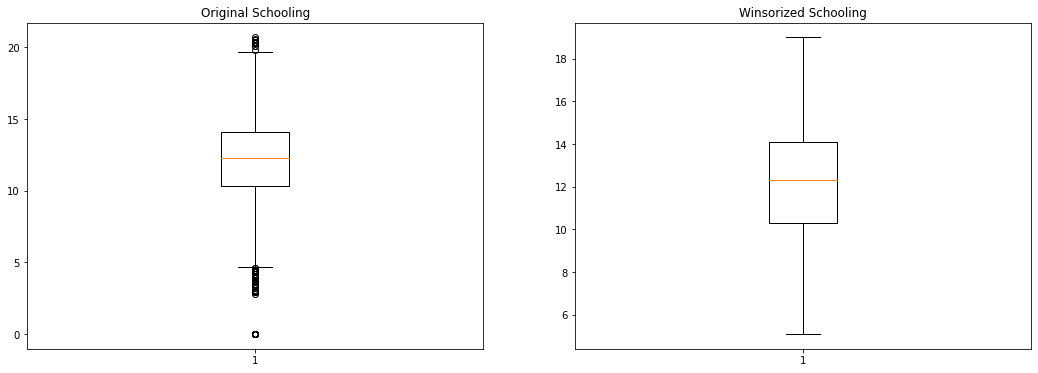

In [61]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df_limpio['Schooling']
plt.boxplot(original_Schooling)
plt.title("Original Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df_limpio['Schooling'],(0.03,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("Winsorized Schooling")

plt.show()

### Creando un dataframe con las columnas sin valores atípicos

In [63]:
df_sin_atipicos = pd.DataFrame()
df_sin_atipicos = df_limpio.copy()
df_sin_atipicos['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
df_sin_atipicos['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
df_sin_atipicos['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
df_sin_atipicos['winsorized_Alcohol'] = winsorized_Alcohol
df_sin_atipicos['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
df_sin_atipicos['winsorized_HepatitisB'] = winsorized_HepatitisB
df_sin_atipicos['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
df_sin_atipicos['winsorized_Polio'] = winsorized_Polio
df_sin_atipicos['winsorized_Tot_Exp'] = winsorized_Tot_Exp
df_sin_atipicos['winsorized_Diphtheria'] = winsorized_Diphtheria
df_sin_atipicos['winsorized_HIV'] = winsorized_HIV
df_sin_atipicos['winsorized_GDP'] = winsorized_GDP
df_sin_atipicos['winsorized_Population'] = winsorized_Population
df_sin_atipicos['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
df_sin_atipicos['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
df_sin_atipicos['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
df_sin_atipicos['winsorized_Schooling'] = winsorized_Schooling
df_sin_atipicos['winsorized_Measles'] = winsorized_Measles

In [66]:
df_sin_atipicos.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Measles
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,...,5.888475,87.118448,0.262151,2505.735502,2.199222e+06,4.623587,4.630191,0.646294,12.068380,100.518720
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,...,2.284703,12.069693,0.220865,2108.556312,2.095995e+06,3.769187,3.781232,0.165581,3.060397,125.567687
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.370000,65.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.341000,5.100000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,...,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,17.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,7.330000,97.000000,0.600000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000,290.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,11.660000,99.000000,0.600000,5714.479370,5.534598e+06,13.800000,13.800000,0.948000,19.000000,290.000000


# Histogramas

### Los histogramas son útiles para visualizar la forma de la distribución de una variable y para detectar patrones o tendencias en los datos.

### Se muestran los histogramas con y sin los valores atípicos.

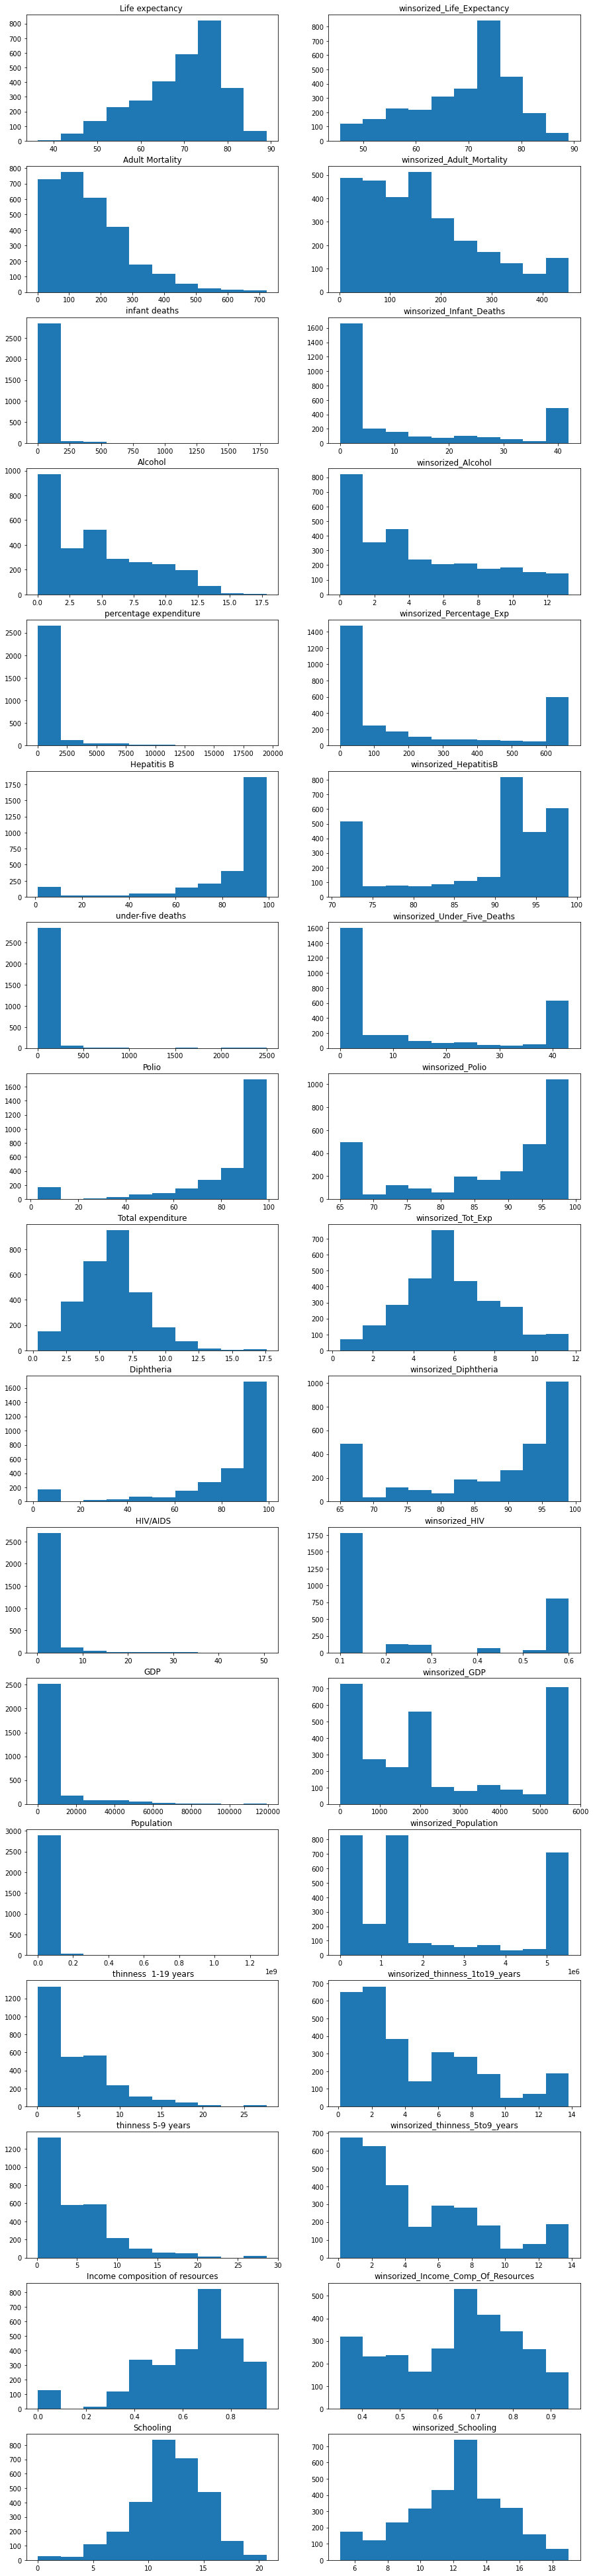

In [67]:
columnas_de_uso = ['Life expectancy ','winsorized_Life_Expectancy','Adult Mortality','winsorized_Adult_Mortality','infant deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','percentage expenditure','winsorized_Percentage_Exp','Hepatitis B',
         'winsorized_HepatitisB','under-five deaths ','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Total expenditure',
         'winsorized_Tot_Exp','Diphtheria ','winsorized_Diphtheria',' HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population',' thinness  1-19 years','winsorized_thinness_1to19_years',' thinness 5-9 years',
         'winsorized_thinness_5to9_years','Income composition of resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(columnas_de_uso)):
    plt.subplot(18,2,i+1)
    plt.hist(df_sin_atipicos[columnas_de_uso[i]])
    plt.title(columnas_de_uso[i])

plt.show()

## Podemos notar que en winsorized_Schooling, winsorized_Tot_Exp y winsorized_Life_Expectancy los datos están bastante normalizados.

## Varianza

### Cálculo de la varianza y desviación estandar para Life Expectancy:

In [68]:
np.var(df_sin_atipicos.loc[0:735,'Life expectancy '])

102.0605387523631

In [69]:
np.var(df_sin_atipicos.loc[736:1470,'Life expectancy '])

73.8281975843399

In [70]:
np.var(df_sin_atipicos.loc[1471:2204,'Life expectancy '])

86.85726777984834

In [71]:
np.var(df_sin_atipicos.loc[2205:2938,'Life expectancy '])

96.9770677977773

In [72]:
np.std(df_sin_atipicos.loc[0:735,'Life expectancy '])

10.102501608629572

## Cálculo de la varianza y desviación estandar de Schooling:

In [73]:
np.var(df_sin_atipicos.loc[0:735,'Schooling'])

11.215714792060517

In [74]:
np.var(df_sin_atipicos.loc[736:1470,'Schooling'])

11.964468027210877

In [75]:
np.var(df_sin_atipicos.loc[1471:2204,'Schooling'])

10.719003704831133

In [76]:
np.var(df_sin_atipicos.loc[2205:2938,'Schooling'])

8.532896150861085

In [ ]:
np.std(df_sin_atipicos.loc[0:735,'Schooling'])

# Analisis de correlacion entre las variables del dataset

### El análisis de correlación es un método utilizado para medir la relación entre dos variables. La correlación mide el grado en que dos variables están relacionadas y puede tomar valores entre -1 y 1.
### El análisis de correlación se utiliza a menudo para evaluar si hay una relación entre dos variables y para predecir cómo una variable cambiará en función de otra.

In [77]:
columns_to_use = ['winsorized_Life_Expectancy','winsorized_Adult_Mortality',
         'winsorized_Infant_Deaths','winsorized_Alcohol','winsorized_Measles','winsorized_Percentage_Exp',
         'winsorized_HepatitisB','winsorized_Under_Five_Deaths','winsorized_Polio',
         'winsorized_Tot_Exp','winsorized_Diphtheria','winsorized_HIV','winsorized_GDP',
         'winsorized_Population','winsorized_thinness_1to19_years',
         'winsorized_thinness_5to9_years','winsorized_Income_Comp_Of_Resources',
         'winsorized_Schooling']

In [78]:
le_corr = df_sin_atipicos.loc[ : , columns_to_use  ].corr()
le_corr

,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Measles,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
winsorized_Life_Expectancy,1.000000,-0.690791,-0.585342,0.392643,-0.336060,0.482396,0.275395,-0.619613,0.587173,0.216093,0.591085,-0.773796,0.545245,-0.066396,-0.527094,-0.527397,0.799490,0.740618
winsorized_Adult_Mortality,-0.690791,1.000000,0.394632,-0.201672,0.213473,-0.314576,-0.206504,0.421457,-0.368300,-0.127373,-0.369742,0.587814,-0.341445,0.079204,0.352287,0.361534,-0.525711,-0.464131
winsorized_Infant_Deaths,-0.585342,0.394632,1.000000,-0.343761,0.569932,-0.377330,-0.320748,0.985851,-0.457103,-0.154880,-0.453238,0.435169,-0.406842,0.319594,0.442393,0.456891,-0.506345,-0.530708
winsorized_Alcohol,0.392643,-0.201672,-0.343761,1.000000,-0.201350,0.374370,0.149457,-0.359155,0.284179,0.308352,0.294701,-0.242268,0.393803,0.020977,-0.438428,-0.430123,0.489420,0.521397
winsorized_Measles,-0.336060,0.213473,0.569932,-0.201350,1.000000,-0.208931,-0.220138,0.561252,-0.322359,-0.152592,-0.324879,0.238138,-0.227671,0.229296,0.361710,0.368291,-0.273389,-0.321029
winsorized_Percentage_Exp,0.482396,-0.314576,-0.377330,0.374370,-0.208931,1.000000,0.151131,-0.399290,0.289190,0.182879,0.297199,-0.327366,0.829866,0.004599,-0.332174,-0.333940,0.544565,0.528218
winsorized_HepatitisB,0.275395,-0.206504,-0.320748,0.149457,-0.220138,0.151131,1.000000,-0.322029,0.595555,0.066644,0.618007,-0.240829,0.203436,-0.120732,-0.122274,-0.131153,0.272720,0.252929
winsorized_Under_Five_Deaths,-0.619613,0.421457,0.985851,-0.359155,0.561252,-0.399290,-0.322029,1.000000,-0.471238,-0.155514,-0.464713,0.475974,-0.435057,0.320466,0.459313,0.470905,-0.548523,-0.565581
winsorized_Polio,0.587173,-0.368300,-0.457103,0.284179,-0.322359,0.289190,0.595555,-0.471238,1.000000,0.164396,0.899107,-0.486280,0.364801,-0.091432,-0.308328,-0.308693,0.538721,0.521349
winsorized_Tot_Exp,0.216093,-0.127373,-0.154880,0.308352,-0.152592,0.182879,0.066644,-0.155514,0.164396,1.000000,0.175464,-0.128050,0.127185,-0.031148,-0.291124,-0.302515,0.183424,0.252422


<AxesSubplot:>

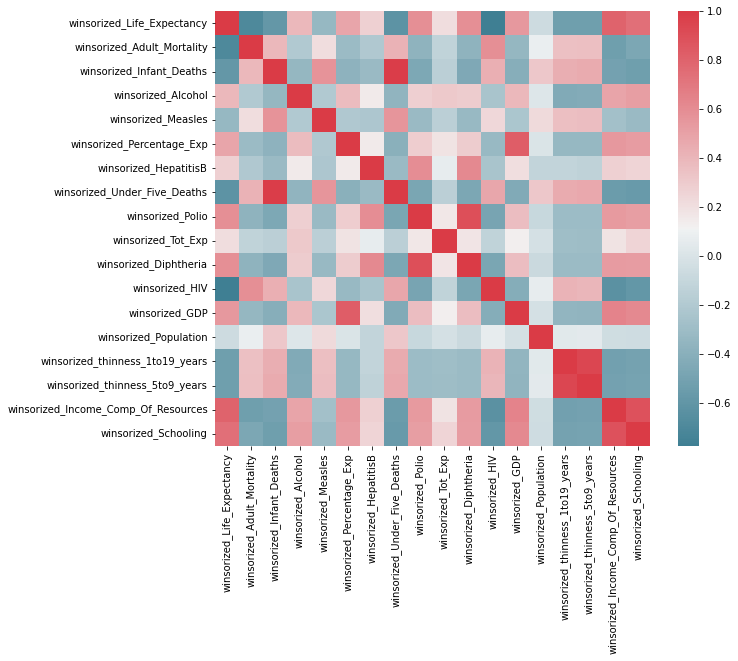

In [79]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(le_corr, mask=np.zeros_like(le_corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Análisis

#### winsorized_Income_Comp_Of_Resources está correlacionado con winsorized_Schooling.

#### winsorized_thinness_1to19_years y winsorized_thinness_5to9_years están correlacionados.

#### winsorized_Percentage_Exp y winsorized_GDP están correlacionados.

#### winsorized_Income_Comp_Of_Resources y winsorized_Life_Expectancy están correlacionados.

#### winsorized_Life_Expectancy y winsorized_Schooling están correlacionados.

#### winsorized_Infant_Deaths y winsorized_Under_Five_Deaths están correlacionados.

#### winsorized_HIV tiene una correlación negativa con winsorized_Life_Expectancy.

#### winsorized_Adult_Mortality tiene una correlación negativa con winsorized_Life_Expectancy.

# Análisis de Frecuencias.

### El análisis de frecuencia es una técnica utilizada para contar la cantidad de veces que un valor o un rango de valores ocurre en un conjunto de datos.
### El análisis de frecuencia es útil para obtener una visión general de la distribución de los datos y para entender mejor cómo se distribuyen los valores en un conjunto de datos.

In [85]:
ana_frec = df_sin_atipicos

In [86]:
ana_frec.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles'],
      dtype='object')

## Porcentaje de Mortalidad por año.

In [84]:
x=ana_frec.loc[: ,['Country', 'Year']]

In [88]:
x['Porcentage Mortality']=(((ana_frec['winsorized_Population']/ 1000)*(ana_frec['winsorized_Adult_Mortality']+ ana_frec['winsorized_Infant_Deaths']+ana_frec['winsorized_Under_Five_Deaths']))/ ana_frec['winsorized_Population'])*100

In [89]:
x

,Country,Year,Porcentage Mortality
0,Afghanistan,2015,34.8
1,Afghanistan,2014,35.6
2,Afghanistan,2013,35.3
3,Afghanistan,2012,35.7
4,Afghanistan,2011,36.0
...,...,...,...
2933,Zimbabwe,2004,52.1
2934,Zimbabwe,2003,51.9
2935,Zimbabwe,2002,13.8
2936,Zimbabwe,2001,51.6


## ¿Cuales son los 10 paises con menor Masa Muscular de los ultimos 5 años?

In [91]:
x= ana_frec.loc[: , ['Country', 'Year', ' BMI ']]

In [92]:
x['orden ']=x.sort_values(['Country', 'Year'], ascending= False).groupby(['Country'])['Year'].rank(method= 'first', ascending = False)

In [93]:
 z = x.loc[x['orden ']<= 5 ,['Country', 'Year',' BMI '] ]

In [94]:
z =z.groupby('Country', as_index= False ).agg({' BMI ': ['max', 'min']})

In [95]:
z.columns= z.columns.droplevel(1)

In [96]:
z.columns=['Country', ' BMI Max ', ' BMI Min ']

In [97]:
z= z.loc[:,['Country', ' BMI Max ',' BMI Min ']].sort_values([' BMI Max '] )

In [98]:
z.head(10)

,Country,BMI Max,BMI Min
142,Saint Kitts and Nevis,5.2,5.2
171,Timor-Leste,17.4,15.8
189,Viet Nam,17.5,14.7
57,Ethiopia,17.6,16.0
12,Bangladesh,18.3,15.8
179,Uganda,18.5,16.7
55,Eritrea,18.6,16.5
26,Burundi,18.7,16.6
76,India,18.7,16.4
0,Afghanistan,19.1,17.2


### ¿Cuales son los 10 paises con mayor porcentaje de niños delgados entre 5 a 9 años ?

In [99]:
x= ana_frec.loc[: , ['Country', 'Year', 'winsorized_thinness_5to9_years']]

In [100]:
x['orden ']=x.sort_values(['Country', 'Year'], ascending= False).groupby(['Country'])['Year'].rank(method= 'first', ascending = False)

In [101]:
z = x.loc[x['orden ']==1  ,['Country', 'Year','winsorized_thinness_5to9_years'] ]

In [103]:
z =z.sort_values('winsorized_thinness_5to9_years', ascending= False)

In [104]:
z.head(10)

,Country,Year,winsorized_thinness_5to9_years
0,Afghanistan,2015,13.8
192,Bangladesh,2015,13.8
1186,India,2015,13.8
1813,Nepal,2015,13.8
2441,Sri Lanka,2015,13.8
288,Bhutan,2015,13.8
1942,Pakistan,2015,13.8
2874,Viet Nam,2015,13.8
1602,Maldives,2015,13.6
2890,Yemen,2015,13.4


### ¿Cuales son los 10 paises con mayor porcentaje de niños delgados entre 1 a 19 años ?

In [106]:
x= ana_frec.loc[: , ['Country', 'Year', 'winsorized_thinness_1to19_years']]

In [107]:
x['orden ']=x.sort_values(['Country', 'Year'], ascending= False).groupby(['Country'])['Year'].rank(method= 'first', ascending = False)

In [108]:
z = x.loc[x['orden ']==1  ,['Country', 'Year','winsorized_thinness_1to19_years'] ]

In [109]:
z =z.sort_values('winsorized_thinness_1to19_years', ascending= False)

In [110]:
z.head(10)

,Country,Year,winsorized_thinness_1to19_years
0,Afghanistan,2015,13.8
2874,Viet Nam,2015,13.8
1942,Pakistan,2015,13.8
2441,Sri Lanka,2015,13.8
1813,Nepal,2015,13.8
192,Bangladesh,2015,13.8
288,Bhutan,2015,13.8
1186,India,2015,13.8
2890,Yemen,2015,13.6
1602,Maldives,2015,13.6


### ¿Cuales son los 10 paises que tienen el mayor porcentaje en las vacunas de Hepatitis B, Polio y Difteria ?

In [111]:
x= ana_frec.loc[:, ['Country', 'Year','winsorized_HepatitisB','winsorized_Polio', 'winsorized_Diphtheria' ]]

In [112]:
x['orden ']=x.sort_values(['Country', 'Year'], ascending= False).groupby(['Country'])['Year'].rank(method= 'first', ascending = False)

In [113]:
z = x.loc[x['orden ']==1  ,['Country', 'Year','winsorized_HepatitisB','winsorized_Polio', 'winsorized_Diphtheria' ] ]

In [114]:
z

,Country,Year,winsorized_HepatitisB,winsorized_Polio,winsorized_Diphtheria
0,Afghanistan,2015,71.0,65.0,65.0
16,Albania,2015,99.0,99.0,99.0
32,Algeria,2015,95.0,95.0,95.0
48,Angola,2015,71.0,65.0,65.0
64,Antigua and Barbuda,2015,99.0,86.0,99.0
...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,87.0,87.0,87.0
2874,Viet Nam,2015,97.0,97.0,97.0
2890,Yemen,2015,71.0,65.0,69.0
2906,Zambia,2015,71.0,65.0,65.0


In [115]:
mejor= z.sort_values(['winsorized_HepatitisB','winsorized_Polio', 'winsorized_Diphtheria'], ascending= False )

In [116]:
mejor.head(10)

,Country,Year,winsorized_HepatitisB,winsorized_Polio,winsorized_Diphtheria
16,Albania,2015,99.0,99.0,99.0
224,Belarus,2015,99.0,99.0,99.0
304,Bolivia (Plurinational State of),2015,99.0,99.0,99.0
368,Brunei Darussalam,2015,99.0,99.0,99.0
560,China,2015,99.0,99.0,99.0
657,Cuba,2015,99.0,99.0,99.0
898,Fiji,2015,99.0,99.0,99.0
1330,Jordan,2015,99.0,99.0,99.0
1394,Kuwait,2015,99.0,99.0,99.0
1586,Malaysia,2015,99.0,99.0,99.0


### ¿Cuales son los 5 paises que tienen el porcentaje mas bajo de vacuna para el Polio en niños de 1 año?

In [117]:
peor = z.sort_values(['winsorized_HepatitisB','winsorized_Polio', 'winsorized_Diphtheria'] )

In [118]:
x=peor.loc[:, ['Country','winsorized_Polio']].sort_values(['winsorized_Polio'])

In [119]:
x.head(5)

,Country,winsorized_Polio
0,Afghanistan,65.0
1474,Lesotho,65.0
1813,Nepal,65.0
1378,Kiribati,65.0
2633,Tonga,65.0


### ¿Cuales son los 5 paises que tienen el porcentaje mas bajo de vacuna para el Hepatitis B en niños de 1 año?

In [120]:
y =peor.loc[:, ['Country','winsorized_HepatitisB']].sort_values(['winsorized_HepatitisB'])

In [121]:
y.head(5)

,Country,winsorized_HepatitisB
0,Afghanistan,71.0
2200,Samoa,71.0
1618,Mali,71.0
2216,San Marino,71.0
1554,Madagascar,71.0


### ¿Cuales son los 5 paises que tienen el porcentaje mas bajo de vacuna para el Difteria en niños de 1 año?

In [123]:
z=peor.loc[:, ['Country','winsorized_Diphtheria']].sort_values(['winsorized_Diphtheria'])

In [124]:
z.head(5)

,Country,winsorized_Diphtheria
0,Afghanistan,65.0
2007,Peru,65.0
2489,Swaziland,65.0
2023,Philippines,65.0
946,Gabon,65.0


# PCA

### PCA es un método de análisis de datos que se utiliza para reducir la dimensionalidad de un conjunto de datos. PCA se basa en la idea de que los datos pueden ser representados de manera más compacta en un espacio de menor dimensionalidad sin perder demasiada información. Esto se logra encontrando una combinación lineal de las variables originales que capture la mayor parte de la variabilidad en los datos. Estas nuevas variables se conocen como componentes principales.

In [125]:
anali_pca = df_sin_atipicos

## Verificamos si existe multicolinealiadad entre algunas columnas

In [127]:
def print_scatter(anali_pca, x_label, y_label):
    N = 2938
    x = anali_pca[x_label]
    y = anali_pca[y_label]
    colors = np.random.rand(N)

    plt.scatter(x, y, c=colors, alpha=0.9)
    plt.show()

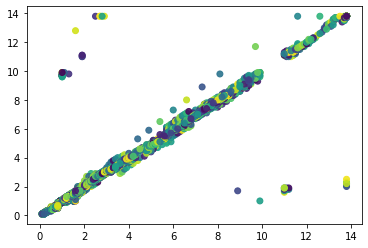

In [128]:
print_scatter(anali_pca, "winsorized_thinness_1to19_years","winsorized_thinness_5to9_years")

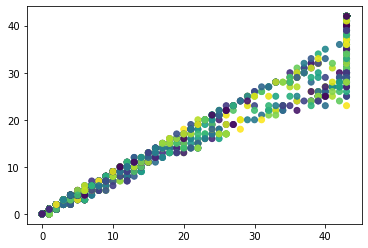

In [129]:
print_scatter(anali_pca, "winsorized_Under_Five_Deaths","winsorized_Infant_Deaths")

### Vemos que entre estas columnas hay una multicolinealidad alta entre ellas por lo tanto excluimos una de del analisis PCA

### Usamos solo las columnas numericas continuas

In [131]:
columnas_a_usar1 = [ 'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol','winsorized_Measles',
        'winsorized_HepatitisB', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years','winsorized_Schooling']

In [132]:
df_pca  = anali_pca.loc[ : , columnas_a_usar1 ].values

## Estandarizamos los valores

### Estandarizar los valores es importante en PCA porque el método utiliza la varianza de las variables para calcular los componentes principales. Si las variables tienen diferentes escalas, entonces la variabilidad de algunas variables puede ser subestimada o sobrestimada en comparación con otras. Al estandarizar los valores, se evita este problema y se garantiza que todas las variables tengan la misma importancia en el análisis.

In [133]:
StandardScaler().fit_transform(df_pca)

array([[-0.44938287,  0.87880998,  1.92022742, ...,  1.59157979,
         2.43500142, -0.6432874 ],
       [-0.98842215,  0.94829529,  1.92022742, ..., -0.89311199,
         2.43500142, -0.67596846],
       [-0.98842215,  0.9222383 ,  1.92022742, ...,  1.59157979,
         2.43500142, -0.70864952],
       ...,
       [-2.49984601, -0.77146606,  0.83427931, ..., -0.98952986,
        -0.90846399, -0.67596846],
       [-2.49984601,  2.52040036,  0.83427931, ...,  1.59157979,
        -0.80232223, -0.74133057],
       [-2.45756842,  2.52040036,  0.77040001, ...,  1.59157979,
         1.69200911, -0.74133057]])

# Aplicamos el algoritmo de reduccion PCA a dos dimensiones

### Algunas ventajas de usuar algoritmos de reduccion a dos dimensiones:
### Visualización: Una de las principales razones de aplicar PCA es poder visualizar los datos en un plano bidimensional. Esto puede ser útil para entender mejor los patrones y relaciones entre las variables y para detectar clusters o grupos en los datos.

### Eficiencia: Reducir los datos a dos dimensiones puede mejorar la eficiencia de los algoritmos de aprendizaje automático que se utilizan para analizar los datos. Esto se debe a que los algoritmos suelen funcionar mejor cuando tienen menos variables que procesar.

### Simplicidad: Reducir los datos a dos dimensiones también puede hacer que sea más fácil entender y explicar los resultados del análisis. Al tener menos variables, es más fácil ver las relaciones entre ellas y hacer predicciones sobre el comportamiento de los datos.

In [135]:
pca = PCA(n_components=2)

### Hacemos una tranformacion a los dos componentes principales

In [137]:
componentesPrincipales = pca.fit_transform(df_pca)

In [138]:
componentesPrincipales

array([[ 3.33537609e+06, -1.83351904e+03],
       [-1.87163991e+06, -1.94887417e+03],
       [ 3.33537609e+06, -1.78615177e+03],
       ...,
       [-2.07369689e+06, -2.50591856e+03],
       [ 3.33537609e+06, -1.87265633e+03],
       [ 3.33537609e+06, -1.87387942e+03]])

In [139]:
print(df_pca.shape)
print(componentesPrincipales.shape)

(2938, 13)
(2938, 2)


In [140]:
pca_df = pd.DataFrame(data=componentesPrincipales , columns=['c1','c2'])

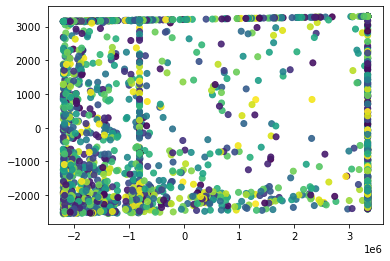

In [141]:
print_scatter(pca_df, 'c1', 'c2')